# **Project Report: Analysis of Daily Activity Data**

# 1. Introduction

This project focuses on analyzing a dataset containing 90 days of daily activity data. The goal is to explore patterns and correlations within the data, particularly focusing on screen time, step count, workdays, and exam days. Additionally, clustering techniques were applied to group similar days and gain further insights into distinct day types.

Dataset Description

The dataset contains the following columns:

Date: The specific date for each entry.

Active Energy (kJ): Calories burned in kilojoules.

Step Count (steps): Total number of steps taken.

Working (1 or 0): Indicates whether it was a workday (1) or not (0).

Midterm (1 or 0): Indicates whether it was an exam day (1) or not (0).

Screen Time (Total) (Hour, minute): Total screen time (in hours and minutes).

Screen Time (PC) (Hour, minute): Screen time spent on the PC.

Screen Time (Mobile) (Hour, minute): Screen time spent on mobile devices.

Days: The day of the week (e.g., Monday, Tuesday, etc.).

# 2. Data Analysis

**2.1 Pre-Midterm Screen Time Analysis**

My type is computer + hand writer student. The before exam periods I feel more comfortable with looking at course materials and writing down the key points to make the best understanding out of it. So before the midterm dates, the time of PC screen time should increase.

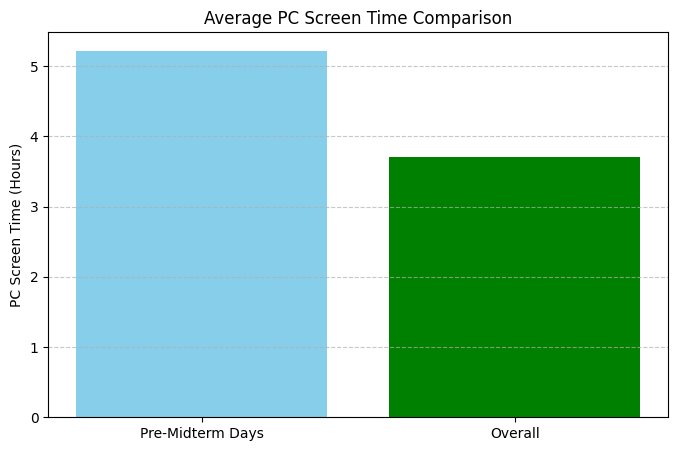

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
import numpy as np

# Load dataset
df = pd.read_excel('DSA210_project.xlsx')

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Helper function to convert time from Hour,minute format to total hours
def time_to_hours(time_str):
    if isinstance(time_str, str) and ',' in time_str:
        hours, minutes = map(float, time_str.split(','))
        return hours + minutes / 60
    return float(time_str)

# Apply the helper function to relevant columns
df['Screen Time (Total)(Hour,minute)'] = df['Screen Time (Total)(Hour,minute)'].apply(time_to_hours)
df['Screen Time (PC)(Hour,minute)'] = df['Screen Time (PC)(Hour,minute)'].apply(time_to_hours)
df['Screen Time (Mobile)(Hour,minute)'] = df['Screen Time (Mobile)(Hour,minute)'].apply(time_to_hours)

# Filter for midterm days
midterm_days = df[df['Midterm (1 or 0)'] == 1]['Date']

# Initialize a list to store PC screen times for 3-4 days before each midterm day
pc_screen_time_pre_midterm = []

for midterm_day in midterm_days:
    pre_days = df[(df['Date'] < midterm_day) & (df['Date'] >= midterm_day - pd.Timedelta(days=4))]
    pc_screen_time_pre_midterm.extend(pre_days['Screen Time (PC)(Hour,minute)'].tolist())

# Calculate the average PC screen time for 3-4 days before midterms
avg_pc_screen_time_pre_midterm = sum(pc_screen_time_pre_midterm) / len(pc_screen_time_pre_midterm)

# Calculate the overall average PC screen time
overall_avg_pc_screen_time = df['Screen Time (PC)(Hour,minute)'].mean()

# Plot the comparison
labels = ['Pre-Midterm Days', 'Overall']
values = [avg_pc_screen_time_pre_midterm, overall_avg_pc_screen_time]

plt.figure(figsize=(8, 5))
plt.bar(labels, values, color=['skyblue', 'green'])
plt.title('Average PC Screen Time Comparison')
plt.ylabel('PC Screen Time (Hours)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**For Hypothesis**

Null Hytothesis : There are observabel differences of PC screen time before midterms and general PC screen times

Alternative Hypothesis: There are no observabel differences of PC screen time before midterms and general PC screen times

In [2]:
from scipy.stats import mannwhitneyu

# Separate pre-midterm screen time (3-4 days before midterm) and non-midterm days
pre_midterm_days = df[(df['Date'] >= midterm_days.min() - pd.Timedelta(days=4)) & (df['Date'] < midterm_days.min())]
non_midterm_days = df[df['Midterm (1 or 0)'] == 0]

# Extract PC screen time for both groups
pre_midterm_screen_time = pre_midterm_days['Screen Time (PC)(Hour,minute)']
non_midterm_screen_time = non_midterm_days['Screen Time (PC)(Hour,minute)']

# Apply Mann-Whitney U test directly since sample size is small
stat, p_value = mannwhitneyu(pre_midterm_screen_time, non_midterm_screen_time, alternative='two-sided')

# Output the result
print("Test Used:", "Mann-Whitney U Test")
print("P-value:", p_value)

if p_value >= 0.05:
    print ("Null hypothesis cannot be rejected")
else:
    print ("Null hypothesis can be rejected")

Test Used: Mann-Whitney U Test
P-value: 0.43296751931403044
Null hypothesis cannot be rejected


Becuase p-value is > 0.05 we cannot reject the null hypothesis.

**2.2 Screen Time on Working Days**

My job is not computer-based one and I nearly never use computer for my job. So I dont really using it. The working period is 8.30 in morning and 19.00 in evening. The transportation also wastes lots of time and the tiredness is in absolute levels during working so generally if there is nothing critical to work on I just prefer to skip anything appart from sleeping. So during working days my computer screen time should be lower than other days
ü

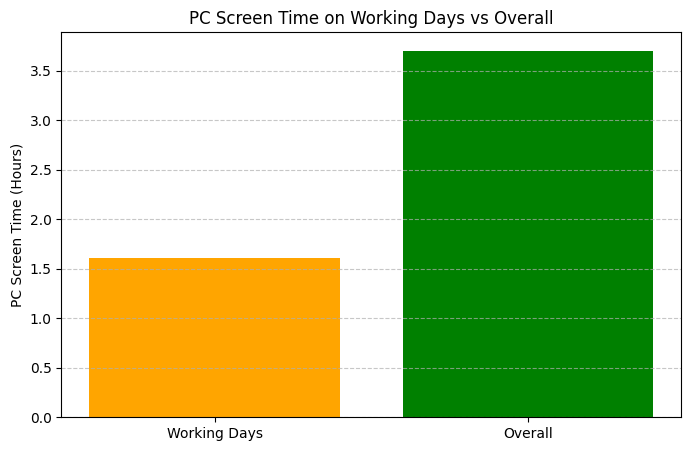

In [3]:
# Filter for working days
working_days = df[df['Working (1 or 0)'] == 1]

# Calculate the average PC screen time on working days
avg_pc_screen_time_working_days = working_days['Screen Time (PC)(Hour,minute)'].mean()

# Plot the comparison
labels = ['Working Days', 'Overall']
values = [avg_pc_screen_time_working_days, overall_avg_pc_screen_time]

plt.figure(figsize=(8, 5))
plt.bar(labels, values, color=['orange', 'green'])
plt.title('PC Screen Time on Working Days vs Overall')
plt.ylabel('PC Screen Time (Hours)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**For Hypothesis**

Null hypothesis: There is no difference of screen times between working and non-working days

Alternative hypothesis: There is difference of screen times between working and non-working days

In [4]:
from scipy.stats import ttest_ind, normaltest, mannwhitneyu

# Separate working days and non-working days screen time
working_days_screen_time = df[df['Working (1 or 0)'] == 1]['Screen Time (PC)(Hour,minute)']
non_working_days_screen_time = df[df['Working (1 or 0)'] == 0]['Screen Time (PC)(Hour,minute)']

# Check normality for both groups
stat_working, p_working = normaltest(working_days_screen_time)
stat_non_working, p_non_working = normaltest(non_working_days_screen_time)

# Apply appropriate test based on normality result
if p_working > 0.05 and p_non_working > 0.05:
    # Use independent t-test if both groups are normally distributed
    stat, p_value = ttest_ind(working_days_screen_time, non_working_days_screen_time)
    test_used = "T-test"
else:
    # Use Mann-Whitney U test if data is not normally distributed
    stat, p_value = mannwhitneyu(working_days_screen_time, non_working_days_screen_time, alternative='two-sided')
    test_used = "Mann-Whitney U Test"

# Output the result
print("Test Used:", test_used)
print("P-value:", p_value)

if p_value >= 0.05:
    print ("Null hypothesis cannot be rejected")
else:
    print ("Null hypothesis can be rejected")

Test Used: Mann-Whitney U Test
P-value: 3.0745018644748963e-09
Null hypothesis can be rejected


Thats why there is a important difference of time spent on PC between working and non-working days

**2.3 Thursday Screen Time Analysis**

My course schedule is mainly integrated days of monday, tuesday, friday. So wednesday, thurday and saturday are my free days during week. There were some days that I did not got to work due to my midterm schedule. Because I am 4th year student and working on graduation project (I already have taken and pass the CS412 Machine Learning course just could not take the CS210 new name DSA210 course because of my schedule availability) the project meetings are planned to thursday and that why I have to bring my PC to work and attend to online zoom meeting during thurdays + workdays. So my thurdays working PC screen times should be more than other working days.

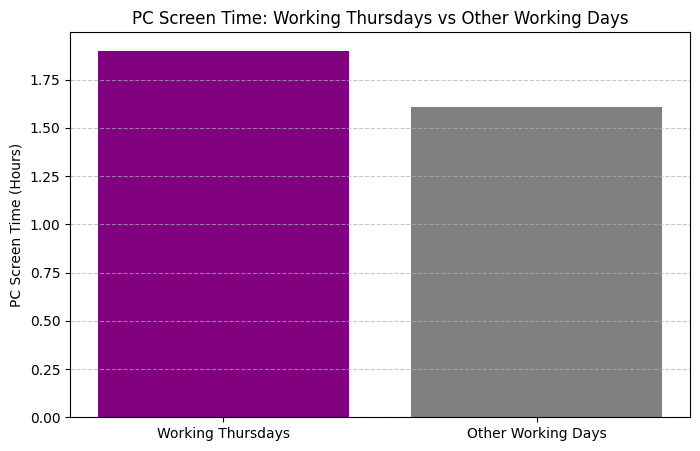

In [5]:
# Calculate the average PC screen time on all working days
avg_pc_screen_time_working_days = df[df['Working (1 or 0)'] == 1]['Screen Time (PC)(Hour,minute)'].mean()

# Filter for working Thursdays
working_thursdays = df[(df['Days'] == 'R') & (df['Working (1 or 0)'] == 1)]

# Calculate the average PC screen time on working Thursdays
avg_pc_screen_time_working_thursdays = working_thursdays['Screen Time (PC)(Hour,minute)'].mean()

# Plot the comparison
labels = ['Working Thursdays', 'Other Working Days']
values = [avg_pc_screen_time_working_thursdays, avg_pc_screen_time_working_days]

plt.figure(figsize=(8, 5))
plt.bar(labels, values, color=['purple', 'gray'])
plt.title('PC Screen Time: Working Thursdays vs Other Working Days')
plt.ylabel('PC Screen Time (Hours)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**For Hypothesis**

Null Hypothesis: Talking base on working days; the thurdays and rest of the days do not have a significant diffrence about PC screen time

Alternative Hypothesis: Talking base on working days; the thurdays and rest of the days do have a significant diffrence about PC screen time

In [6]:
from scipy.stats import ttest_ind, normaltest, mannwhitneyu

# Filter for working days and working Thursdays
working_days = df[df['Working (1 or 0)'] == 1]['Screen Time (PC)(Hour,minute)']
working_thursdays = df[(df['Days'] == 'R') & (df['Working (1 or 0)'] == 1)]['Screen Time (PC)(Hour,minute)']

# Check normality for both groups
stat_working, p_working = normaltest(working_days)
stat_thursday, p_thursday = normaltest(working_thursdays)

# Apply appropriate test based on normality result
if p_working > 0.05 and p_thursday > 0.05:
    # Use independent t-test if both groups are normally distributed
    stat, p_value = ttest_ind(working_thursdays, working_days)
    test_used = "T-test"
else:
    # Use Mann-Whitney U test if data is not normally distributed
    stat, p_value = mannwhitneyu(working_thursdays, working_days, alternative='two-sided')
    test_used = "Mann-Whitney U Test"

# Output the result
print("Test Used:", test_used)
print("P-value:", p_value)

if p_value >= 0.05:
    print ("Null hypothesis cannot be rejected")
else:
    print ("Null hypothesis can be rejected")

Test Used: Mann-Whitney U Test
P-value: 0.6343763152931656
Null hypothesis cannot be rejected


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  res = hypotest_fun_out(*samples, **kwds)


Because p-value is greater than 0.05 our null hytpothesis cannot be rejected thus the differences cannot be solided.

**2.4 Correlation Between Step Count and Screen Time**

The step count and the total screen time should have negative correlation between them; because time spent on screen eventually decrease the person mobility in most of the cases.

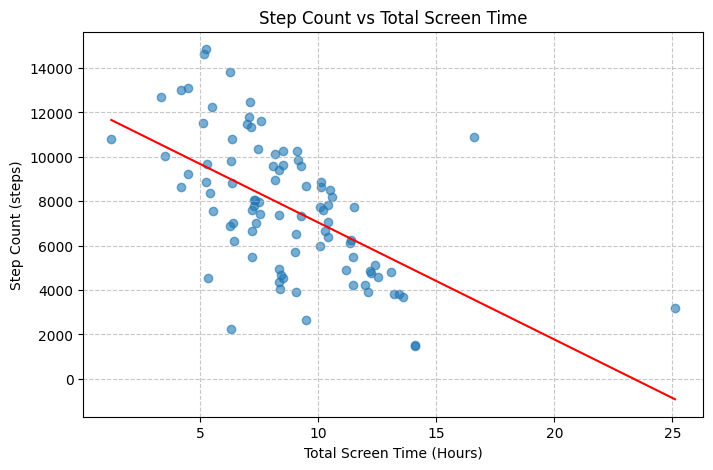

In [7]:
# Calculate correlation between step count and total screen time
correlation_step_screen = df['Step Count (steps)'].corr(df['Screen Time (Total)(Hour,minute)'])

# Scatter plot with regression line
x = df['Screen Time (Total)(Hour,minute)']
y = df['Step Count (steps)']
coefficients = np.polyfit(x, y, 1)
poly_eq = np.poly1d(coefficients)

x_line = np.linspace(x.min(), x.max(), 100)
y_line = poly_eq(x_line)

plt.figure(figsize=(8, 5))
plt.scatter(x, y, alpha=0.6)
plt.plot(x_line, y_line, color='red')
plt.title('Step Count vs Total Screen Time')
plt.xlabel('Total Screen Time (Hours)')
plt.ylabel('Step Count (steps)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

**If we clear the outliers from data:**

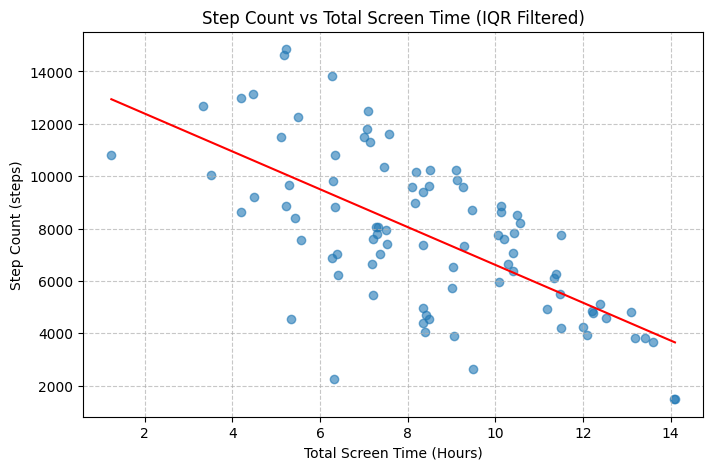

Correlation after IQR-based filtering: -0.6541703651130463


In [8]:
# Calculate IQR for Step Count and Total Screen Time
Q1 = df['Step Count (steps)'].quantile(0.25)
Q3 = df['Step Count (steps)'].quantile(0.75)
IQR_step = Q3 - Q1

Q1_screen = df['Screen Time (Total)(Hour,minute)'].quantile(0.25)
Q3_screen = df['Screen Time (Total)(Hour,minute)'].quantile(0.75)
IQR_screen = Q3_screen - Q1_screen

# Filter out outliers based on IQR (1.5 * IQR rule)
filtered_df = df[(df['Step Count (steps)'] >= Q1 - 1.5 * IQR_step) &
                 (df['Step Count (steps)'] <= Q3 + 1.5 * IQR_step) &
                 (df['Screen Time (Total)(Hour,minute)'] >= Q1_screen - 1.5 * IQR_screen) &
                 (df['Screen Time (Total)(Hour,minute)'] <= Q3_screen + 1.5 * IQR_screen)]

# Extract filtered columns for correlation and plotting
x = filtered_df['Screen Time (Total)(Hour,minute)']
y = filtered_df['Step Count (steps)']

# Calculate correlation after IQR-based filtering
correlation_step_screen_filtered = x.corr(y)

# Scatter plot with regression line
coefficients = np.polyfit(x, y, 1)
poly_eq = np.poly1d(coefficients)

x_line = np.linspace(x.min(), x.max(), 100)
y_line = poly_eq(x_line)

plt.figure(figsize=(8, 5))
plt.scatter(x, y, alpha=0.6)
plt.plot(x_line, y_line, color='red')
plt.title('Step Count vs Total Screen Time (IQR Filtered)')
plt.xlabel('Total Screen Time (Hours)')
plt.ylabel('Step Count (steps)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

print("Correlation after IQR-based filtering:", correlation_step_screen_filtered)


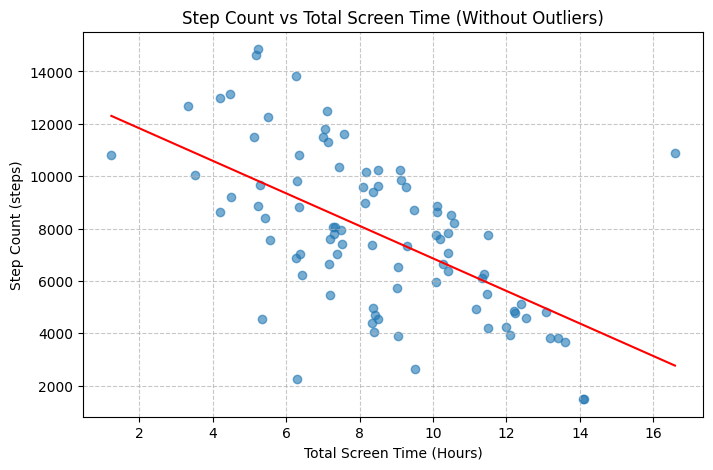

Correlation after removing outliers: -0.5865365217897008


In [32]:
from scipy.stats import zscore

# Calculate Z-scores for Step Count and Total Screen Time
df['Z_Step'] = zscore(df['Step Count (steps)'])
df['Z_ScreenTime'] = zscore(df['Screen Time (Total)(Hour,minute)'])

# Filter out the outliers (keep rows where absolute Z-score < 3)
filtered_df = df[(df['Z_Step'].abs() < 3) & (df['Z_ScreenTime'].abs() < 3)]

# Extract filtered columns for correlation and plotting
x = filtered_df['Screen Time (Total)(Hour,minute)']
y = filtered_df['Step Count (steps)']

# Calculate correlation
correlation_step_screen_filtered = x.corr(y)

# Scatter plot with regression line
coefficients = np.polyfit(x, y, 1)
poly_eq = np.poly1d(coefficients)

x_line = np.linspace(x.min(), x.max(), 100)
y_line = poly_eq(x_line)

plt.figure(figsize=(8, 5))
plt.scatter(x, y, alpha=0.6)
plt.plot(x_line, y_line, color='red')
plt.title('Step Count vs Total Screen Time (Without Outliers)')
plt.xlabel('Total Screen Time (Hours)')
plt.ylabel('Step Count (steps)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

print("Correlation after removing outliers:", correlation_step_screen_filtered)


**Looking with Spearman Correlation**

**Why Spearman ?**

Although data looks like pearson correlation would give perfect fit the step count and screen time relation would be more defined as monotonic relation. If we want to use pearson the linearty will be the key aspect however in our case the monotonocity is the key thats why looking from spearman window would be much more accurate from my sight of views.

**Hypothesis**

Null hypothesis: There is no negative correletaion between step count and total screen time

Alternative hypothesis: There is a negative correlation between step count and total screen time.

In [11]:
from scipy.stats import spearmanr

data = df

# Drop the NaN data from step count and Screen time
cleaned_data = data.dropna(subset=['Step Count (steps)', 'Screen Time (Total)(Hour,minute)'])

# Calculate the Spearman correlation ve p-value
correlation, p_value = spearmanr(cleaned_data['Step Count (steps)'], cleaned_data['Screen Time (Total)(Hour,minute)'])

print(f"Spearman Correlation: {correlation}")
print(f"P-value: {p_value}")


Spearman Correlation: -0.6068118114819537
P-value: 1.8209281134573636e-10


Because p-value is < 0.05; we need to reject null hypothesis and accept the alternative hypothesis which will correct our understanding.

Also in the spearman correlation perspective the value is -0.607 which shows the tendcy towards -1 and actually near. If we speak abput spearman its values arrong -1 to +1 in which -1 tells us about total negative correlation while +1 vice-versa. Our result also shows negative correlation between screen time and step count.

**3. Clustering Analysis**

3.1 I also try to cluster the data with the best number of k to create other observe patterns from my data.

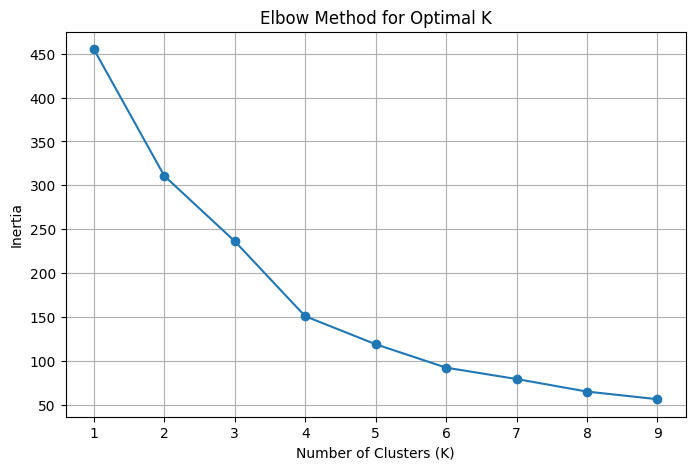

In [12]:
# Select relevant features for clustering
features = df[['Step Count (steps)', 'Screen Time (Total)(Hour,minute)', 'Active Energy (kJ)', 'Working (1 or 0)', 'Midterm (1 or 0)']]

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Determine the optimal number of clusters using Elbow Method
inertia = []
k_range = range(1, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

With elbow method we can observe that there is less angle in point 4.

**3.2 Clustering with K = 4**

With elbow method we got 4 and proceed to clustering

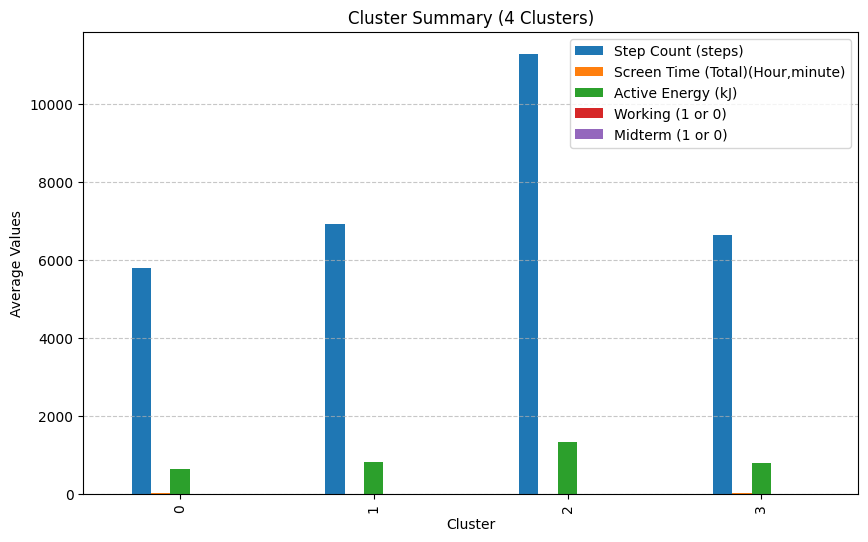

In [28]:
# Apply KMeans with 4 clusters
kmeans_4 = KMeans(n_clusters=4, random_state=42)
df['Cluster_4'] = kmeans_4.fit_predict(features_scaled)

# Calculate the mean of each feature for each cluster
cluster_summary_4 = df.groupby('Cluster_4')[
    ['Step Count (steps)', 'Screen Time (Total)(Hour,minute)', 'Active Energy (kJ)', 'Working (1 or 0)', 'Midterm (1 or 0)']
].mean()

# Bar chart for clusters
cluster_summary_4.plot(kind='bar', figsize=(10, 6))
plt.title('Cluster Summary (4 Clusters)')
plt.xlabel('Cluster')
plt.ylabel('Average Values')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In PCA view

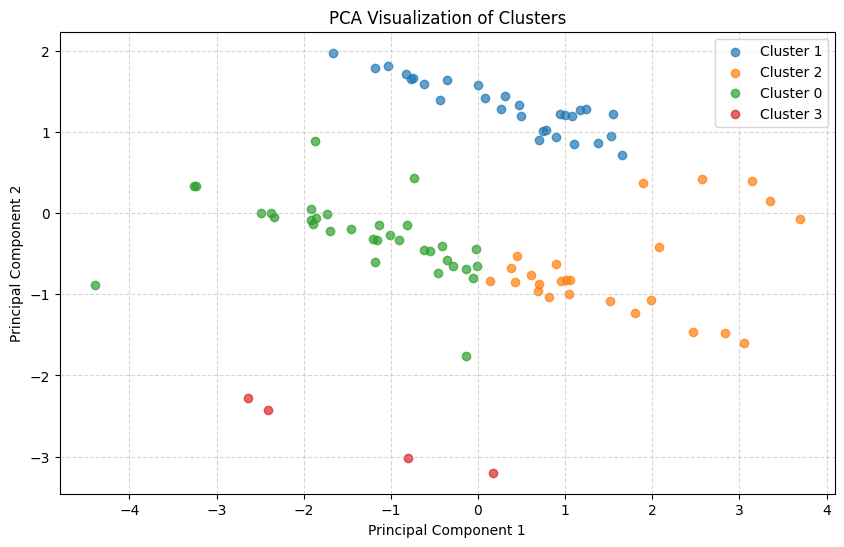

Explained variance ratio: [0.49226668 0.24943093]


In [29]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA to reduce the dimensionality to 2 components for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_scaled)

# Create a DataFrame with the principal components and cluster labels
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = data['Cluster_4']

# Plot the PCA result with cluster labels
plt.figure(figsize=(10, 6))
for cluster in pca_df['Cluster'].unique():
    cluster_data = pca_df[pca_df['Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}', alpha=0.7)

plt.title('PCA Visualization of Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Print explained variance ratio
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")


Lets see the specs of clusters

In [30]:
# Function to describe each cluster with feature values in English
def describe_cluster(cluster_id, cluster_means):
    description = f"Cluster {cluster_id}:\n"
    for feature, value in cluster_means.items():
        description += f"- {feature}: {value:.2f}\n"
    return description

# Generate and print descriptions for all clusters
for cluster_id, cluster_means in cluster_summary_4.iterrows():
    print(describe_cluster(cluster_id, cluster_means))
    print()


Cluster 0:
- Step Count (steps): 5800.09
- Screen Time (Total)(Hour,minute): 11.54
- Active Energy (kJ): 639.00
- Working (1 or 0): 0.00
- Midterm (1 or 0): 0.00


Cluster 1:
- Step Count (steps): 6941.31
- Screen Time (Total)(Hour,minute): 6.97
- Active Energy (kJ): 817.21
- Working (1 or 0): 1.00
- Midterm (1 or 0): 0.00


Cluster 2:
- Step Count (steps): 11297.84
- Screen Time (Total)(Hour,minute): 6.73
- Active Energy (kJ): 1340.77
- Working (1 or 0): 0.20
- Midterm (1 or 0): 0.00


Cluster 3:
- Step Count (steps): 6651.00
- Screen Time (Total)(Hour,minute): 10.84
- Active Energy (kJ): 802.12
- Working (1 or 0): 0.00
- Midterm (1 or 0): 1.00




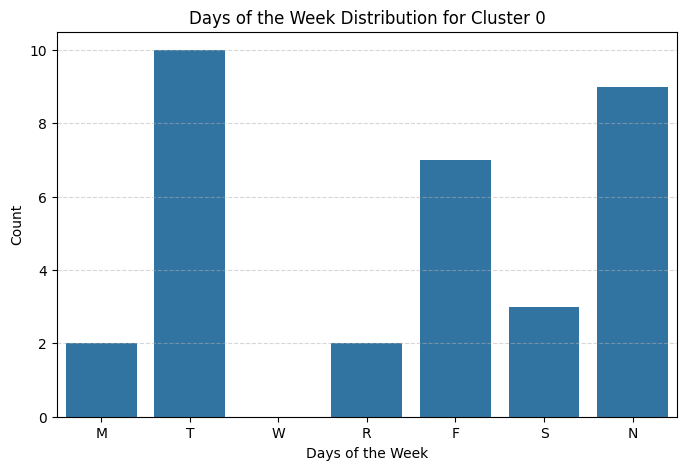

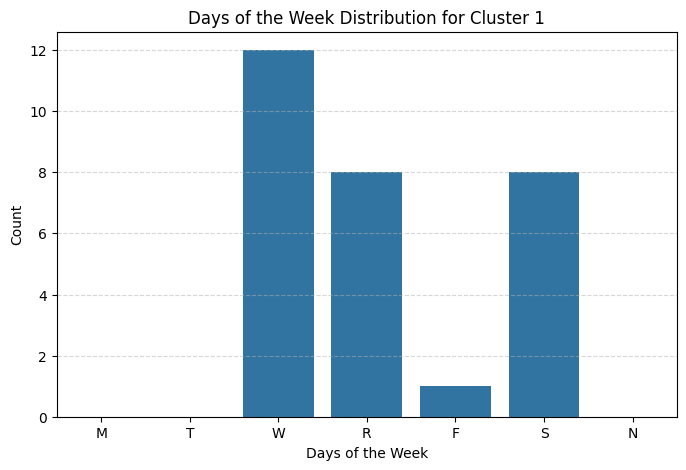

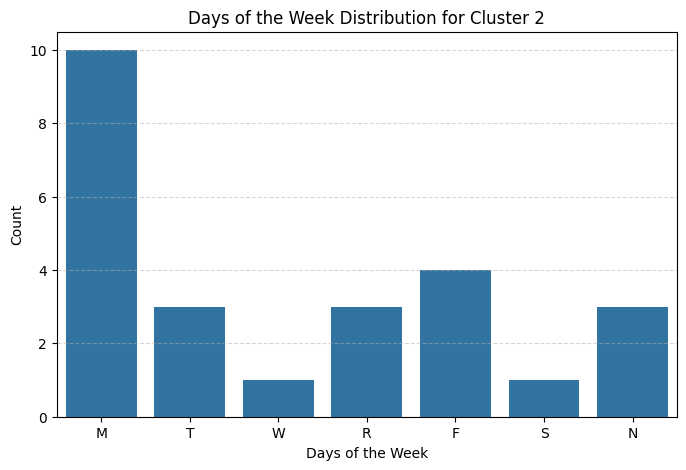

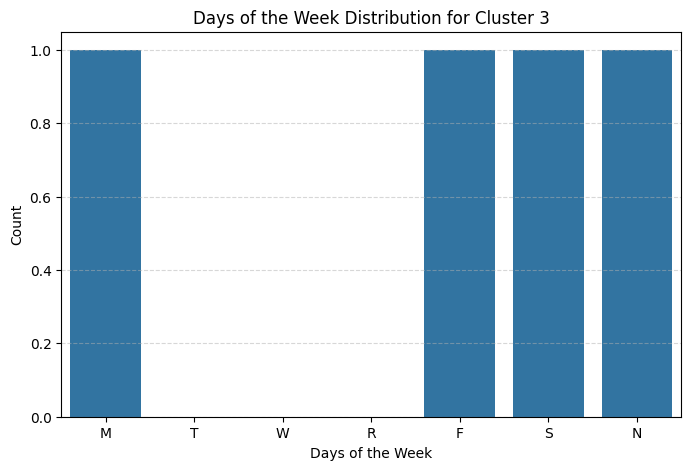

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the correct order for the days of the week
day_order = ['M', 'T', 'W', 'R', 'F', 'S', 'N']

# Count the days of the week for each cluster
days_distribution = data.groupby('Cluster_4')['Days'].value_counts().unstack().fillna(0)

# Reorder the columns to match the specified day order
days_distribution = days_distribution[day_order]

# Plot bar charts for each cluster
for cluster_id in days_distribution.index:
    plt.figure(figsize=(8, 5))
    sns.barplot(x=days_distribution.columns, y=days_distribution.loc[cluster_id])
    plt.title(f'Days of the Week Distribution for Cluster {cluster_id}')
    plt.xlabel('Days of the Week')
    plt.ylabel('Count')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.show()


**Conclusion**

This project successfully analyzed 90 days of daily activity data and identified key patterns, including:

Increased screen time before exams.

Reduced screen time on workdays.

Higher screen time on Thursdays due to meetings.

Moderate negative correlation between step count and screen time.

Clustering analysis revealed distinct day types.

Future work could involve applying more advanced machine learning models or incorporating external factors such as weather data to enhance predictions.